<b>Problem:</b>
<p>NASA has obtained the following image from the Mars Rover. The image contains a strong periodic electromagnetic noise pollution. Delete the image noise and improve everything you can. <i>Tip: Notch filters</i>:</p>
<img width="30%" src="images/martec.jpeg">

<b>Add Required Packages:</b>

In [ ]:
Pkg.add("Images")
Pkg.add("ImageMagick")
Pkg.add("ImageView")
Pkg.add("PyPlot")
kg.add("Gadfly")

Pkg.update()

<b>Adquire Image & Display Functions:</b>

In [8]:
function getImgMatrix(file)
    #Adquire Image, convert to Gray and then return a Array{Int32} object
    binImage=convert(Image{Gray},load(file))
    grayImage=raw(binImage)

    imgMatrix = convert(Array{Int32},grayImage)
    return imgMatrix
end

function displayGrayMatrix(imgMatrix)
    imgMatrix2 = convert(Array{Int32},abs(imgMatrix))
    imgOut = convert(Array{UInt8,2},imgMatrix2)
    imgOut = grayim(imgOut)
    display(imgOut)
end

displayGrayMatrix (generic function with 1 method)

<b>Notch Filter:</b>

In [61]:
function notchPassFilter(imgMaxtrix, band, width)
    
    F = fft(imgMatrix)
    F = fftshift(F)
    
    rows,cols=size(imgMatrix)
    
    mFilter = convert(Array{Int32},ones(rows,cols)) 
    
    for i=1: rows
        for j=1: cols
            dist = ((i - rows / 2) ^ 2 + (j - cols / 2) ^ 2) ^ 0.5
            if band <= dist && dist < band + width
                mFilter[j,i] = 0
            end
        end
    end
    
    out = mFilter.* F
    out = ifftshift(out)
    out = fft(out)
    out = real(out)
    
    return out
end

notchPassFilter (generic function with 1 method)

<b>Execution:</b>

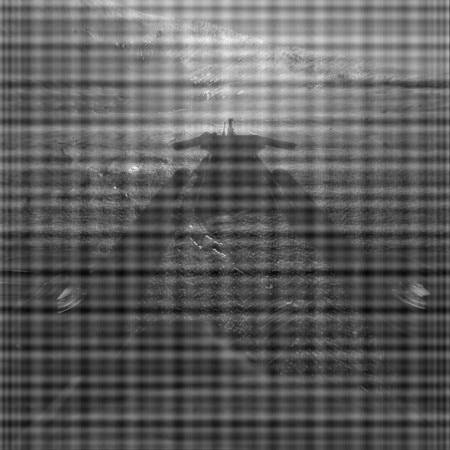

In [72]:
using Images, Colors, FixedPointNumbers, ImageView

imgMatrix = getImgMatrix("images/martec.jpeg")

width = 5
bands = [ 70; 35; 20; 25; 65; 10 ]

for i=1: 6
    band = bands[1]
    imgMatrix = notchPassFilter(imgMatrix, band, width)
end

out = imgMatrix - minimum(imgMatrix)
out = (out / maximum(imgMatrix)) * 255
out = convert(Array{Int32},round(out))

displayGrayMatrix(out)